<img src="img/decisionmaking.png" width="400">

# ELEC-E7851 - ELEC-E7890 - User Research
# Lecture 3 - Inference

**Aurélien Nioche**

Aalto University

<div class="alert alert-block alert-success">
<h2><img src="img/logo/goal.png" width="20" align="left">&nbsp;Learning objectives</h2>
    <br>
    <ul>
        <li> Understand what is a <i>p</i> value and a confidence interval
        <li> Differenciate effect robustness and size effect
        <li> Differenciate parametric and non-parametric inferential tests
        <li> Differenciate what is a type-1 and type-2 error
        <li> Being able to assess the external validy of a study
    </ul>
</div>

## Course Overview

<br>
<span style="font-size:1.2rem; font-weight:bold">

<a href="#Conclusive-Remarks-and-a-Few-Take-Aways">Conclusive Remarks and a Few Take Aways</a>

<a href="#Additional-material">Additional material</a>

# 1. Inferential statistics: what for?
<a href="#Course-Overview">Course Overview</a>

Let's considerate data $D_N$ that follows a normal distribution, that is such that:
$$ D_N\sim \mathcal{N} (\mu ,\sigma )$$
the probability density function of the normal distribution being :
$$ {f(x)= \frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}} $$

In [97]:
# Import the libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import string  # for adding letters in the figures
import scipy.special as sps  # For gamma function
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

np.set_printoptions(threshold=8)  # Don't print to much elements

In [98]:
# Define the parameters of my samples
mean_1 = 150.0
mean_2 = 200.0

small_sd = 10.0
large_sd = 50.0

n = 100

In [99]:
np.random.seed(4)  # Seed the random number generator for reproducibility

x1_small_sd = np.random.normal(mean_1, scale=small_sd, size=n)
x2_small_sd = np.random.normal(mean_2, scale=small_sd, size=n)

x1_large_sd = np.random.normal(mean_1, scale=large_sd, size=n)
x2_large_sd = np.random.normal(mean_2, scale=large_sd, size=n)

print("x1_small_std:", x1_small_sd)
print("x2_small_std:", x2_small_sd)
print("x1_large_std:", x1_large_sd)
print("x2_large_std:", x2_large_sd)

x1_small_std: [150.50561707 154.99951333 140.04091069 ... 148.2853539  140.55631401
 152.80864675]
x2_small_std: [207.38247111 206.50753231 206.1474063  ... 208.76742482 195.17121314
 190.14581539]
x1_large_std: [126.36685922 154.8133972  211.46066976 ... 181.62572316 194.21939087
 214.11836842]
x2_large_std: [259.72581298 175.06396376 195.96301932 ... 250.30749908 222.71614304
 179.27631164]


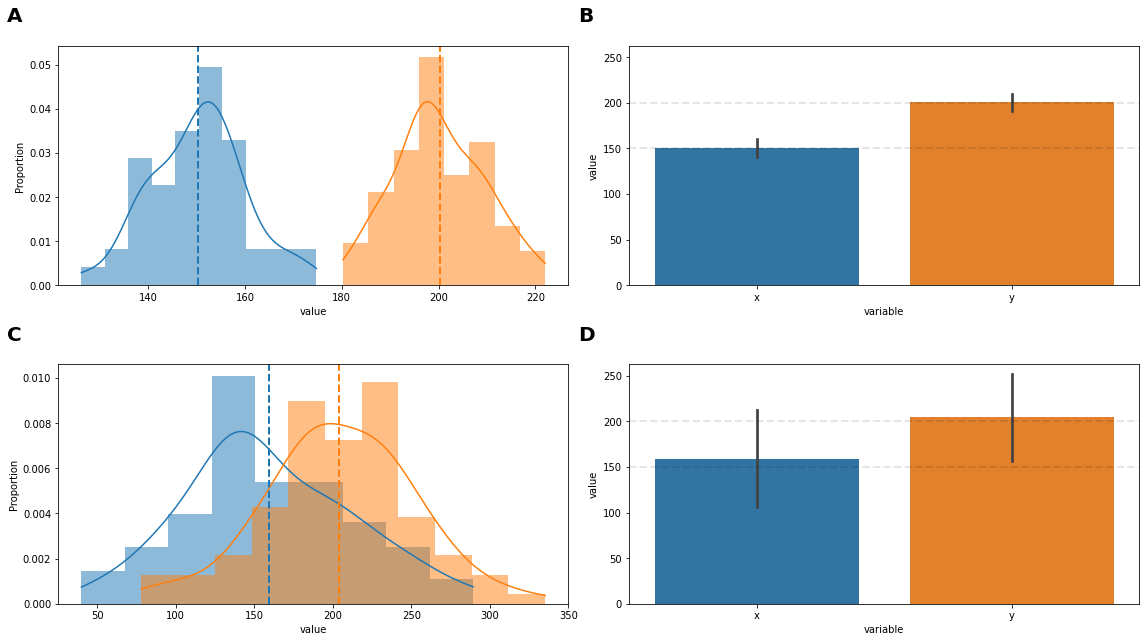

In [100]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 9))

i = 0
for val1, val2 in ((x1_small_sd, x2_small_sd), (x1_large_sd, x2_large_sd)):

    ax = axes[i, 0]
    sns.histplot(val1, ax=ax, color="C0", kde=True, linewidth=0, alpha=0.5, stat="density")
    sns.histplot(val2, ax=ax, color="C1", kde=True, linewidth=0, alpha=0.5, stat="density")

    ax.axvline(np.mean(val1), label="mean", color='C0', lw=2, ls='--')
    ax.axvline(np.mean(val2), label="mean", color='C1', lw=2, ls='--')

    ax.set_ylabel("Proportion")
    ax.set_xlabel("value")

    ax = axes[i, 1]

    df = pd.DataFrame({
        "x": val1,
        "y": val2
    }).melt()

    sns.barplot(x="variable", y="value", ax=ax, data=df, ci="sd")

    ax.set_ylim(0, max(mean_1, mean_2) + large_sd * 1.25)
    ax.axhline(mean_1, ls='--', color='black', alpha=0.1, lw=2)
    ax.axhline(mean_2, ls='--', color='black', alpha=0.1, lw=2)

    i += 1
    
for i, ax in enumerate(axes.flatten()):
    ax.text(-0.1, 1.1, string.ascii_uppercase[i], transform=ax.transAxes, 
            size=20, weight='bold')

plt.tight_layout()
plt.show()

In [101]:
t, p = stats.ttest_ind(x1_large_sd, x2_large_sd)
print(f"t={t}, p={p}")

t=-6.2698379730170615, p=2.2209697178288552e-09


# What's an inferential statistic? What's the p-value?
<a href="#Course-Overview">Course Overview</a>

<img src="img/William_Sealy_Gosset.jpg">
<center>William S. Gosset or "Student"</center>

The t statistic to test whether the means are different can be calculated as follows:

$${\displaystyle t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}{\sqrt {\frac {2}{n}}}}}}$$
where $n = n_1 = n_2$ and $s_p$ is the pooled standard deviation of the two samples.

The pooled standard deviation of the two samples $X_1$ and $X_2$ is defined as:

$${\displaystyle s_{p}={\sqrt {\frac {s_{X_{1}}^{2}+s_{X_{2}}^{2}}{2}}}.}$$
 and $s_{X_1}^2$ and $s_{X_2}^2$ are the unbiased estimators of the variances of the two samples, s.t.

$${s_{X=[x_1, ..., x_n]}^{2}= {\frac {1}{n-1}}\sum _{i=1}^{n}\left(x_{i}-{\overline {X}}\right)^{2}}$$

The denominator of t is the standard error of the difference between two means.

Original article: <a href="doi:10.1093/biomet/6.1.1">Student" William Sealy Gosset (1908). "The probable error of a mean" (PDF). Biometrika. 6 (1): 1–25</a>.

In [102]:
n=20

mu1, mu2 = 100, 115
sigma = 30

np.random.seed(1234)
x1 = np.random.normal(mu1, scale=sigma, size=n)
x2 = np.random.normal(mu2, scale=sigma, size=n)

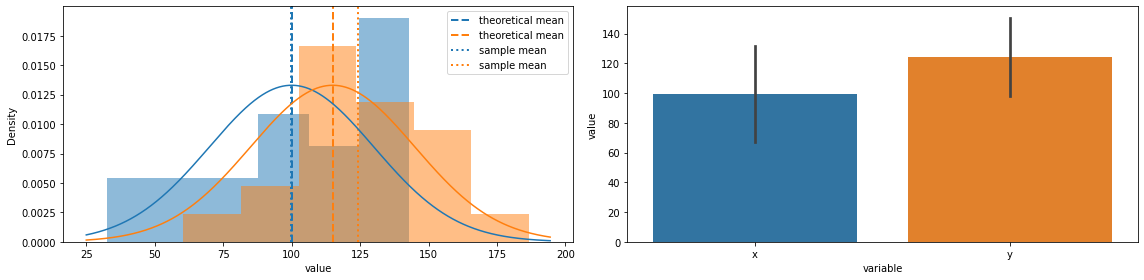

In [107]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

ax = axes[0]
sns.histplot(x1, ax=ax, color="C0", linewidth=0, alpha=0.5, stat="density")
sns.histplot(x2, ax=ax, color="C1", linewidth=0, alpha=0.5, stat="density")

ax.axvline(mu1, label="theoretical mean", color='C0', lw=2, ls='--')
ax.axvline(mu2, label="theoretical mean", color='C1', lw=2, ls='--')

ax.axvline(np.mean(x1), label="sample mean", color='C0', lw=2, ls=':')
ax.axvline(np.mean(x2), label="sample mean", color='C1', lw=2, ls=':')

x_min, x_max= ax.get_xlim()

x_th = np.linspace(x_min, x_max, 1000)
y_th = stats.distributions.norm.pdf(x_th, loc=mu1, scale=sigma)
ax.plot(x_th, y_th, color="C0")

x_th = np.linspace(x_min, x_max, 1000)
y_th = stats.distributions.norm.pdf(x_th, loc=mu2, scale=sigma)
ax.plot(x_th, y_th, color="C1")

ax.set_ylabel("Density")
ax.set_xlabel("value")
ax.legend()

ax = axes[1]
df = pd.DataFrame({"x": x1, "y": x2}).melt()
sns.barplot(x="variable", y="value", ax=ax, data=df, ci="sd")

plt.tight_layout()
plt.show()

In [108]:
mean1 = np.mean(x1)
mean2 = np.mean(x2)

var1 = np.var(x1, ddof=1)
var2 = np.var(x2, ddof=1)

sp = np.sqrt((var1 + var2)/2)
denom = sp * np.sqrt(2 / n)

d = mean1 - mean2
t = d/denom

print("t", t)

t -2.5912486170605766


In [111]:
t, p = stats.ttest_ind(x1, x2)
print("t", t, "p", p)

t -2.591248617060576 p 0.013492277877684325


---

Student's t-distribution has the <b>probability density function</b> given by:
$$f(x) = \frac{\Gamma \left(\frac{\nu+1}{2} \right)} {\sqrt{\nu\pi}\,\Gamma \left(\frac{\nu}{2} \right)} \left(1+\frac{x^2}{\nu} \right)^{-\frac{\nu+1}{2}}$$
where $\nu$  is the number of degrees of freedom $\Gamma (\alpha )$ is the gamma function. For all positive integers, $ \Gamma (\alpha )=(\alpha -1)!$

For significance testing, the degrees of freedom for this test is $2n − 2$ where n is the number of participants in each group.

In [112]:
df = 2*n - 2
print("degrees of freedom:", df)

degrees of freedom: 38


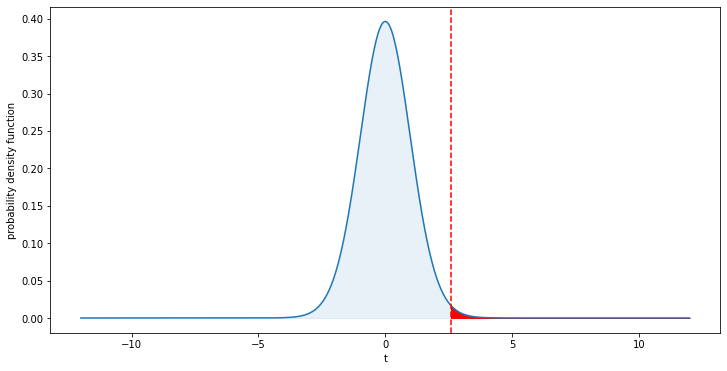

In [113]:
g = sps.gamma

abs_t = np.abs(t)

x = np.linspace(-12, 12, 1000)
y = (g((df+1)/2) / (np.sqrt(df * np.pi)*g(df/2))) * (1+x**2/df) ** (-(df+1)/2)

x_blue = np.linspace(-12, abs_t, 1000)
y_blue = (g((df+1)/2) / (np.sqrt(df * np.pi)*g(df/2))) * (1+x_blue**2/df) ** (-(df+1)/2)

x_red = np.linspace(abs_t, 12, 1000)
y_red = (g((df+1)/2) / (np.sqrt(df * np.pi)*g(df/2))) * (1+x_red**2/df) ** (-(df+1)/2)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x, y)

ax.fill_between(x_blue, 0, y_blue, color="C0", alpha=0.1)

ax.fill_between(x_red, 0, y_red, color="red")
ax.axvline(abs_t, ls='--', color="red")

ax.set_xlabel("t")
ax.set_ylabel("probability density function")

plt.show()

---

The <b>cumulative density function</b> is given by:
$$
     F(x) = \frac{1}{2} + x \Gamma \left( \frac{\nu+1}{2} \right)  \times
     \frac{\,_2F_1 \left ( \frac{1}{2},\frac{\nu+1}{2};\frac{3}{2};
           -\frac{x^2}{\nu} \right)}
     {\sqrt{\pi\nu}\,\Gamma \left(\frac{\nu}{2}\right)}$$
where $_2F_1$ is the hypergeometric function

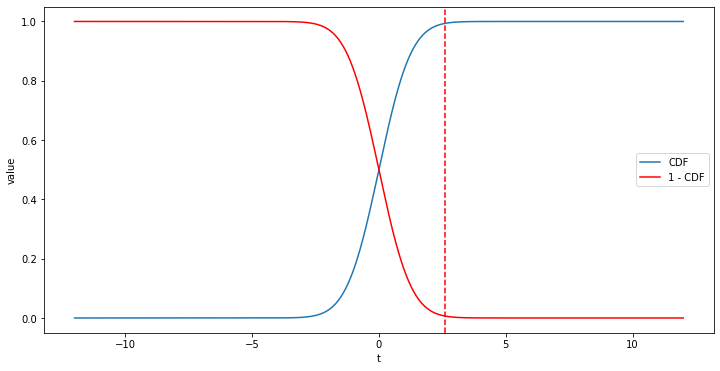

In [114]:
x = np.linspace(-12, 12, 1000)

fig, ax = plt.subplots(figsize=(12, 6))

y1 = stats.distributions.t.cdf(x, df)
ax.plot(x, y1, label="CDF", color="C0")
ax.set_xlabel("t")
ax.set_ylabel("value")

ax.plot(x, 1 - y1, label="1 - CDF", color="red")
ax.set_xlabel("t")

ax.axvline(abs_t, ls='--', color="red")

ax.legend()
plt.show()

In [115]:
p = (1 - stats.distributions.t.cdf(abs_t, df)) * 2
print("p", p)

p 0.013492277877684256


In [116]:
t, p = stats.ttest_ind(x1, x2)
print("t", t, "p", p)

t -2.591248617060576 p 0.013492277877684325


---

Note: For further explanation, you can refer to: <a href="https://doi.org/10.1038/nmeth.2698">Krzywinski, M., Altman, N. Significance, P values and t-tests. Nat Methods 10, 1041–1042 (2013).</a>

## One sided vs two-sided

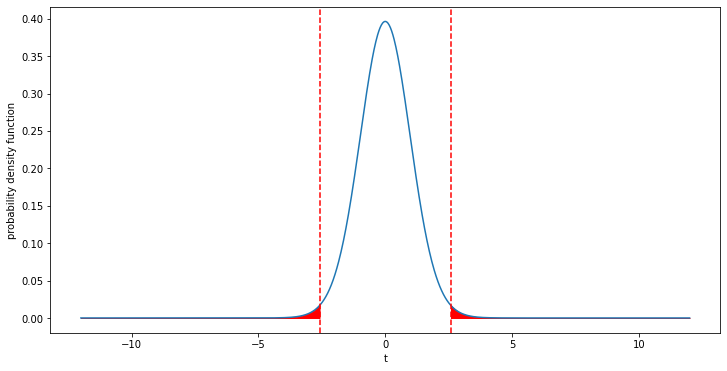

In [117]:
g = sps.gamma

min_x, max_x = -12, 12

x = np.linspace(min_x, max_x, 1000)
y = (g((df+1)/2) / (np.sqrt(df * np.pi)*g(df/2))) * (1+x**2/df) ** (-(df+1)/2)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y)
ax.set_xlabel("t")
ax.set_ylabel("probability density function")

t_value = 1.2

for t_ in (abs_t, -abs_t):
    if t_ > 0:
        x = np.linspace(t_, max_x, 1000)
    else:
        x = np.linspace(min_x, t_, 1000)
    y_f = (g((df+1)/2) / (np.sqrt(df * np.pi)*g(df/2))) * (1+x**2/df) ** (-(df+1)/2)
    ax.fill_between(x, 0, y_f, color="red")
    ax.axvline(t_, ls='--', color="red")
plt.show()

**Note: Two sided is more conservative than one sided**

## The 'significance' threshold

In human/animal related studies, $p=0.05$ (5% error)

<img src="img/comics_sign.jpeg" width="600">

## The number of subjects matters

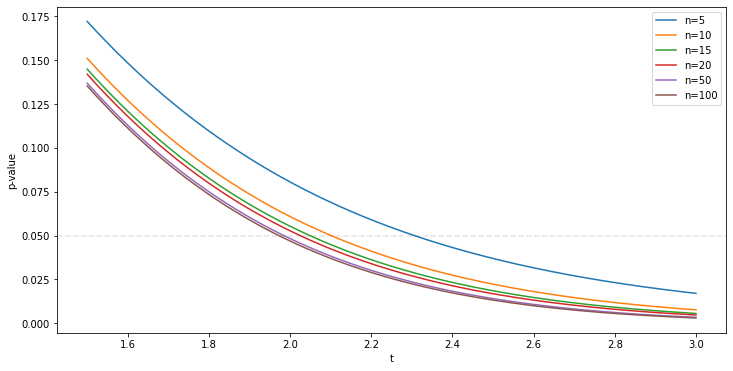

In [118]:
x = np.linspace(1.5, 3, 1000)
ns = [5, 10, 15, 20, 50, 100]

fig, ax = plt.subplots(figsize=(12, 6))

for n in ns:
    df = 2*n - 2
    y = (1 - stats.distributions.t.cdf(x, df)) * 2

    ax.plot(x, y, label=f"n={n}")
    
ax.set_xlabel("t")
ax.set_ylabel("p-value")

ax.axhline(0.05, ls='--', color="black", alpha=0.1)
ax.legend()

plt.show()

The more you will increase your $n$, the more you will increase the probability to have significant results

## The condition of application of a stastical test

<img src="img/doc_t_test.png" width="600">

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left">&nbsp;Important</h2>
    <br>
    A statistical test have <b>conditions</b> of application relative to the <b>shape of the distributions</b> you wish to compare
    </div>

Apply a Student t-test only if:
* samples have equal size
* distributions are normally distributed
* variance of each sample is the same

## The number of subjects is not the same and/or variances are unequal

In [119]:
np.random.seed(4)

m1, m2 = 100, 150
sd1, sd2 = 50, 10

n = 100

x1 = np.random.normal(m1, scale=sd1, size=n)
x2 = np.random.normal(m2, scale=sd2, size=n)
print("x1", x1)
print("x2", x2)

x1 [102.52808536 124.99756666  50.20455344 ...  91.42676952  52.78157003
 114.04323377]
x2 [157.38247111 156.50753231 156.1474063  ... 158.76742482 145.17121314
 140.14581539]


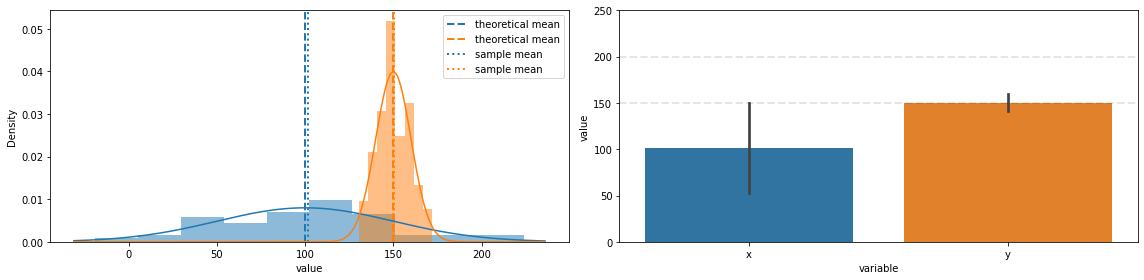

In [120]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

ax = axes[0]
sns.histplot(x1, ax=ax, color="C0", linewidth=0, alpha=0.5, stat="density")
sns.histplot(x2, ax=ax, color="C1", linewidth=0, alpha=0.5, stat="density")

ax.axvline(m1, label="theoretical mean", color='C0', lw=2, ls='--')
ax.axvline(m2, label="theoretical mean", color='C1', lw=2, ls='--')

ax.axvline(np.mean(x1), label="sample mean", color='C0', lw=2, ls=':')
ax.axvline(np.mean(x2), label="sample mean", color='C1', lw=2, ls=':')

x_min, x_max= ax.get_xlim()

x_th = np.linspace(x_min, x_max, 1000)
y_th = stats.distributions.norm.pdf(x_th, loc=m1, scale=sd1)
ax.plot(x_th, y_th, color="C0")

x_th = np.linspace(x_min, x_max, 1000)
y_th = stats.distributions.norm.pdf(x_th, loc=m2, scale=sd2)
ax.plot(x_th, y_th, color="C1")

ax.set_ylabel("Density")
ax.set_xlabel("value")
ax.legend()

ax = axes[1]

df = pd.DataFrame({
    "x": x1,
    "y": x2
}).melt()

sns.barplot(x="variable", y="value", ax=ax, data=df, ci="sd")

ax.set_ylim(0, max(m1, m2) + max(sd1, sd2) * 2)
ax.axhline(mean_1, ls='--', color='black', alpha=0.1, lw=2)
ax.axhline(mean_2, ls='--', color='black', alpha=0.1, lw=2)

plt.tight_layout()
plt.show()

## Welch's t-test

$${\displaystyle t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{\bar {\Delta }}}}}$$
where

$${\displaystyle s_{\bar {\Delta }}={\sqrt {{\frac {s_{1}^{2}}{n_{1}}}+{\frac {s_{2}^{2}}{n_{2}}}}}.}$$

## The distribution is not (does not seem) normal

Let's now consider the data follows a Gamma distribution, that is such that:
$$ D_G \sim \mathrm{Gamma} (\alpha ,\beta )$$
the probability density function of the Gamma distribution being :
$${\begin{aligned}f(x;\alpha ,\beta )&={\frac {\beta ^{\alpha }x^{\alpha -1}e^{-\beta x}}{\Gamma (\alpha )}}\quad {\text{ for }}x>0\quad \alpha ,\beta >0,\\[6pt]\end{aligned}}$$
where $\Gamma (\alpha )$ is the gamma function. For all positive integers, $ \Gamma (\alpha )=(\alpha -1)!$

In [121]:
# From the doc: Samples are drawn from a Gamma distribution with specified parameters, 
# shape (sometimes designated “k”) and scale (sometimes designated “theta”), 
# where both parameters are > 0.
# knowing that theta = 1/beta
np.random.seed(124)
k1, t1 = 1, 10
k2, t2 = 1.3, 14
x1 = np.random.gamma(k1, scale=t1, size=25)
x2 = np.random.gamma(k2, scale=t2, size=25)

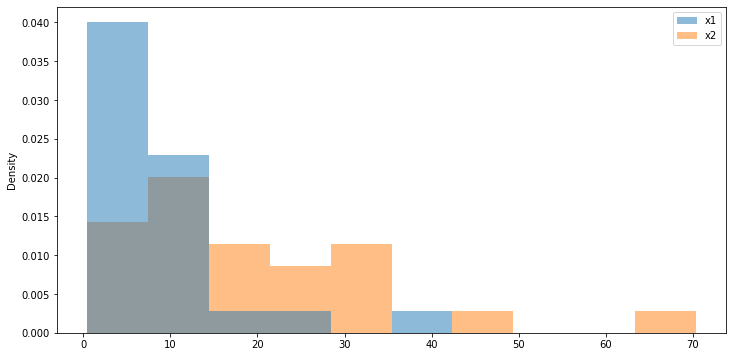

In [122]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(ax=ax, data=pd.DataFrame({"x1": x1, "x2": x2}),
             stat="density",  linewidth=0, alpha=0.5)

plt.show()

## Mann–Whitney U test 

1. Assign numeric ranks to all the observations (put the observations from both groups to one set), beginning with 1 for the smallest value. Where there are groups of tied values, assign a rank equal to the midpoint of unadjusted rankings. E.g., the ranks of (3, 5, 5, 5, 5, 8) are (1, 3.5, 3.5, 3.5, 3.5, 6) (the unadjusted rank would be (1, 2, 3, 4, 5, 6)).


In [123]:
n1 = len(x1)
n2 = len(x2)
ranked = stats.rankdata(np.concatenate((x1, x2)))
print("ranked value", ranked)

ranked value [ 2. 32. 22. ... 45. 50. 31.]


2. add up the ranks for the observations which came from sample 1. The sum of ranks in sample 2 is now determinate, since the sum of all the ranks equals $N(N + 1)/2$ where $N$ is the total number of observations.

$U$ is then given by:

$$U_{1}=R_{1}-{n_{1}(n_{1}+1) \over 2}\,\!$$
where n1 is the sample size for sample 1, and R1 is the sum of the ranks in sample 1.

$$U_{2}=R_{2}-{n_{2}(n_{2}+1) \over 2}\,\!$$

In [124]:
rank_x = ranked[0:n1]  # get the x-ranks
u1 = n1 * n2 + (n1 * (n1 + 1)) / 2.0 - np.sum(rank_x, axis=0)  # calc U for x1
u2 = n1 * n2 - u1  # remainder is U for x2
print(f"u1 = {u1}; u2 = {u2}")

u1 = 494.0; u2 = 131.0


For large samples (n>20), U is approximately normally distributed, with 

$$\mu = \frac {n_{1}n_{2}}{2}$$

$$\sigma^2 = \sqrt {n_1 n_2 (n_1+n_2+1) \over 12}$$
if there is no tie, else a correction is necessary:

$$\sigma^2_{\text{corr}}={\sqrt {{n_{1}n_{2} \over 12}\left((n+1)-\sum _{i=1}^{k}{{t_{i}}^{3}-t_{i} \over n(n-1)}\right)}}\,$$

where $n = n_1 + n_2$, $t_i$ is the number of subjects sharing rank $i$, and $k$ is the number of (distinct) ranks.

In [125]:
mean_rank = n1*n2/2.0
print("mean_rank", mean_rank)

mean_rank 312.5


In [126]:
sd = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12.0) # We assume that there is not tie here
print("sd", sd)

sd 51.53882032022076


In [127]:
u = max(u1, u2)
p = (1 - stats.norm.cdf(u, loc=mean_rank, scale=sd)) * 2
print("p", p)

p 0.0004289228995439931


In [128]:
# Alternative: compute Z-score first
z = (u - mean_rank) / sd
p = (1 - stats.norm.cdf(z)) * 2
print("p", p)

p 0.0004289228995439931


Original article: <a href="doi:10.1214/aoms/1177730491">Mann, Henry B.; Whitney, Donald R. (1947). "On a Test of Whether one of Two Random Variables is Stochastically Larger than the Other". Annals of Mathematical Statistics. 18 (1): 50–60.</a> 

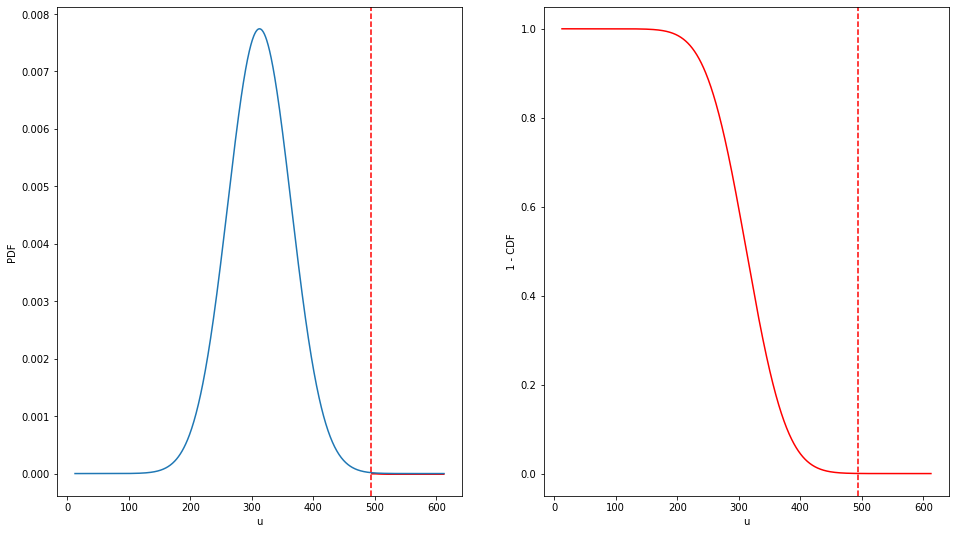

In [129]:
x_min, x_max = mean_rank-300, mean_rank+300
mu, sigma = mean_rank, sd
x = np.linspace(x_min, x_max, 1000)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

x_f = np.linspace(u, x_max)
y_f = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x_f - mu)**2 / (2 * sigma**2) )

y2 = (1 - stats.norm.cdf(x, loc=mu, scale=sigma))

fig, axes = plt.subplots(ncols=2, figsize=(16, 9))

ax1, ax2 = axes

ax1.plot(x, y)
ax1.fill_between(x_f, 0, y_f, color="red")
ax1.axvline(u, ls='--', color="red")
ax1.set_xlabel("u")
ax1.set_ylabel("PDF")

ax2.plot(x, y2, color="red")
ax2.axvline(u, ls='--', color="red")
ax2.set_xlabel("u")
ax2.set_ylabel("1 - CDF")

plt.show()

<img src="img/doc_mw.png" width="600">

## I have more than one factor (independant variable)

ANOVA (Analysis of variance) is probably what you're looking for...

In [130]:
df = pd.read_csv("data/stcp-Rdataset-Diet.csv")
print(df.head())

   Person gender  Age  Height  pre.weight  Diet  weight6weeks
0      25          41     171          60     2          60.0
1      26          32     174         103     2         103.0
2       1      0   22     159          58     1          54.2
3       2      0   46     192          60     1          54.0
4       3      0   55     170          64     1          63.3


In [131]:
print(df.count())

Person          78
gender          78
Age             78
Height          78
pre.weight      78
Diet            78
weight6weeks    78
dtype: int64


In [132]:
df["Loss"] = df["pre.weight"] - df["weight6weeks"]
print(df.head())

   Person gender  Age  Height  pre.weight  Diet  weight6weeks  Loss
0      25          41     171          60     2          60.0   0.0
1      26          32     174         103     2         103.0   0.0
2       1      0   22     159          58     1          54.2   3.8
3       2      0   46     192          60     1          54.0   6.0
4       3      0   55     170          64     1          63.3   0.7


In [133]:
print(df["gender"].unique())

[' ' '0' '1']


In [134]:
df = df[df["gender"] != ' ']
print(df.count())

Person          76
gender          76
Age             76
Height          76
pre.weight      76
Diet            76
weight6weeks    76
Loss            76
dtype: int64


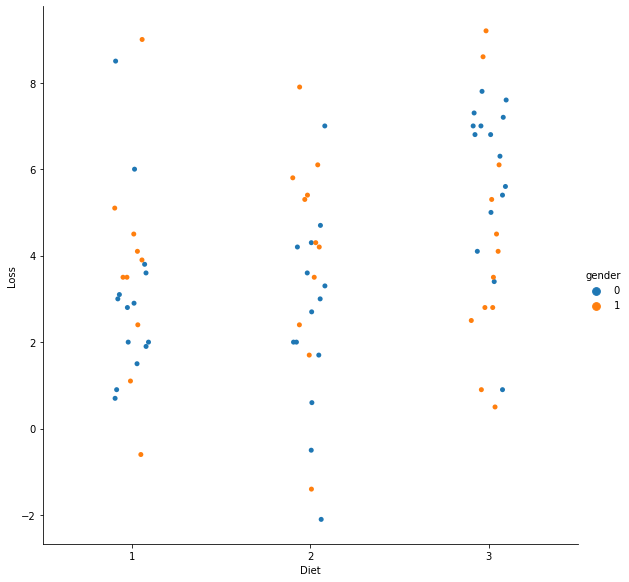

In [135]:
g = sns.catplot(x="Diet", y="Loss", hue="gender",
                data=df, height=8)
plt.show()

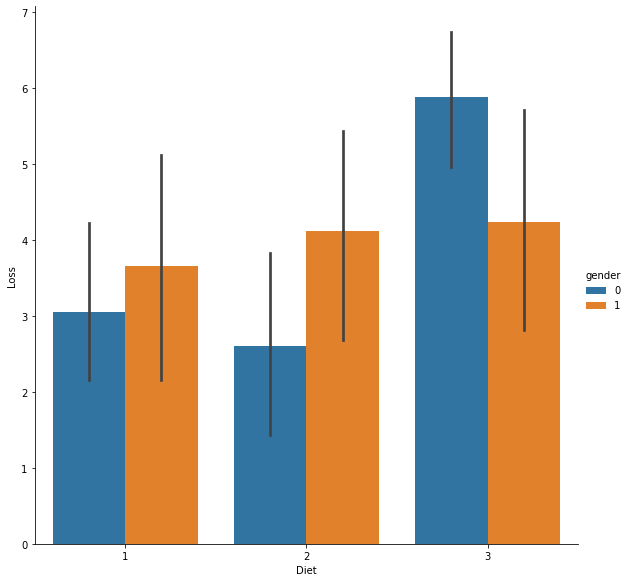

In [136]:
g = sns.catplot(x="Diet", y="Loss", hue="gender",
               data=df, kind="bar", height=8)
plt.show()

In [137]:
formula = 'Loss ~ C(Diet) * C(gender)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                       sum_sq    df         F    PR(>F)
C(Diet)             60.417220   2.0  5.619026  0.005456
C(gender)            0.168696   1.0  0.031379  0.859910
C(Diet):C(gender)   33.904068   2.0  3.153204  0.048842
Residual           376.329043  70.0       NaN       NaN


Data from <a href="https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv">https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv</a>

## I want to test the relation between two (continuous) variables

Regression analysis is probably what you're looking for...

In [138]:
df = pd.read_csv(os.path.join("data", "rr.csv"))
print(df.head())

     Country  Year        Debt    Growth
0  Australia  1946  190.419080 -3.557951
1  Australia  1947  177.321371  2.459475
2  Australia  1948  148.929811  6.437534
3  Australia  1949  125.828699  6.611994
4  Australia  1950  109.809398  6.920201


<AxesSubplot:xlabel='Debt', ylabel='Growth'>

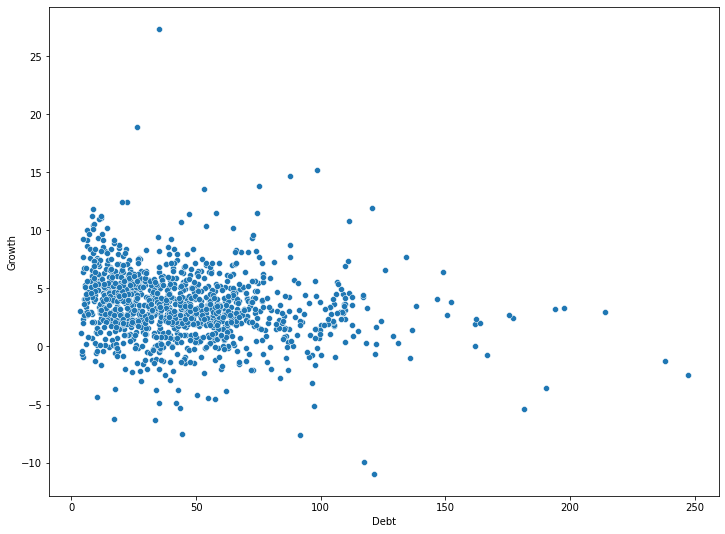

In [139]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.scatterplot(x="Debt", y="Growth", ax=ax, data=df)

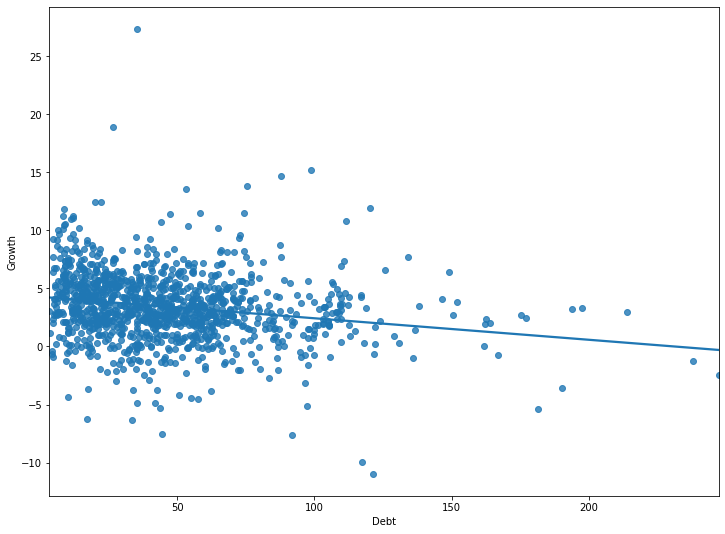

In [140]:
fig, ax =plt.subplots(figsize=(12, 9))
sns.regplot(x="Debt", y="Growth", data=df, ax=ax, ci=None)
plt.show()


## Pearson correlation coefficient

$$r_{xy}= \frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sqrt {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})^{2}\sum \limits _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}$$

where $\overline {x}$ and $\overline {y}$ are the sample means of $X$ and $Y$, and $s_{x}$ and $s_{y}$ are the corrected sample standard deviations of $X$ and $Y$.

Original article Pearson, Karl (1895). "Notes on regression and inheritance in the case of two parents". Proceedings of the Royal Society of London. 58: 240–242.

In [141]:
x, y = df["Debt"], df["Growth"]

r_num = np.sum((x - np.mean(x)) * (y - np.mean(y)))
r_denom = np.sqrt(np.sum((x - np.mean(x))**2))*np.sqrt(np.sum((y - np.mean(y))**2))
r = r_num/r_denom
print("r", r)

r -0.19986576578883178


---

Inference a Student's t-distribution:
$$t=r{\sqrt {\frac {\nu}{1-r^{2}}}}$$
with $\nu = n-2$ the number of degrees of freedom

In [142]:
n = len(x)
dof = n - 2
t = r * np.sqrt(dof/(1 - r**2))
p = 2 * (1 - stats.distributions.t.cdf(np.abs(t), dof))
print("p", p)

p 4.723998969780041e-12


In [143]:
r_, p = stats.pearsonr(x, y)
print(f"r={r_}, p={p}")

r=-0.19986576578883178, p=4.723997934448434e-12


## Linear regression

$$y = \alpha + \beta x$$ 
which means in this case:
$$\text{Growth} = \beta + \beta \text{Debt}$$


with:
$$ \alpha ={\bar {y}}-{\beta }\,{\bar {x}}$$

$$ \beta ={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}$$

In [144]:
beta = r_num / np.sum((x - np.mean(x))**2)
alpha = np.mean(y) - beta*np.mean(x)
print(f"alpha={alpha} beta={beta}")

alpha=4.270368134671323 beta=-0.018493267021115034


Don't forget to read the doc!

<img src="img/doc_cor.png" width="500">
<img src="img/doc_cor2.png" width="500">

In [145]:
# For having the parameters of the regression line
res = stats.linregress(df["Debt"], df["Growth"])
print(res)

LinregressResult(slope=-0.018493267021115038, intercept=4.270368134671323, rvalue=-0.19986576578883175, pvalue=4.723997934448468e-12, stderr=0.002647122136256058)


In [146]:
# Using 'statsmodels' library which is more 'R' like and more verbose
formula = "Growth ~ Debt"
model =  ols(formula, df).fit()  #sm.OLS(Y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Growth   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     48.81
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           4.72e-12
Time:                        22:47:38   Log-Likelihood:                -2930.9
No. Observations:                1175   AIC:                             5866.
Df Residuals:                    1173   BIC:                             5876.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2704      0.150     28.558      0.0

---

Note: Pay attention if the measure given by a study/library is $R$ or $R^2$

---

Data from <a href="https://pubs.aeaweb.org/doi/pdf/10.1257/aer.100.2.573">Reinhart, C. M., & Rogoff, K. S. (2010). Growth in a Time of Debt. American economic review, 100(2), 573-78.</a>

# I have only one group

so you may want to compute a... 
## confidence interval

$$P(-z\leq Z\leq z)=1-\alpha$$
The number z follows from the cumulative distribution function, in this case the cumulative normal distribution function:

$$\begin{aligned}\Phi (z)&=P(Z\leq z)=1-{\tfrac {\alpha }{2}}=0.975,\\[6pt]z&=\Phi ^{-1}(\Phi (z))=\Phi ^{-1}(0.975)=1.96,\end{aligned}$$
and we get:

$$\begin{aligned}0.95&=1-\alpha =P(-z\leq Z\leq z)=P\left(-1.96\leq {\frac {{\bar {X}}-\mu }{\sigma /{\sqrt {n}}}}\leq 1.96\right)\\[6pt]&=P\left({\bar {X}}-1.96{\frac {\sigma }{\sqrt {n}}}\leq \mu \leq {\bar {X}}+1.96{\frac {\sigma }{\sqrt {n}}}\right).\end{aligned}$$
In other words, the lower endpoint of the 95\% confidence interval is:

In [ ]:
level=0.95
a = 1.0 * np.array(data)
n = len(a)
m, se = np.mean(a), scipy.stats.sem(a)
out_cdf = (1 + level) / 2.
dof = n-1
h = se * scipy.stats.t.ppf(out_cdf, dof)  # Percent point function: inverse of the CDF
return m, m-h, m+h

## Error type I vs Error type II

 || Null hypothesis is true | null hypothesis is false |
|--- | --- | ----------- |
|**Reject null hypothesis**| False positive = Type I error | true negative |
|**Do not reject null hypothesis** | True positive | False negative = Type II error |

## Error type I

In [147]:
np.random.seed(14)

m1, m2 = 100, 100
sd1, sd2 = 10, 10

n = 20

x1 = np.random.normal(m1, scale=sd1, size=n)
x2 = np.random.normal(m2, scale=sd2, size=n)
print("x1", x1)
print("x2", x2)

x1 [115.51339111 100.79186025 101.73976528 ... 107.77935866  97.62510322
  81.08087655]
x2 [ 88.27878206 108.36206971 110.092734   ...  81.94276544  94.99629811
  94.35219354]


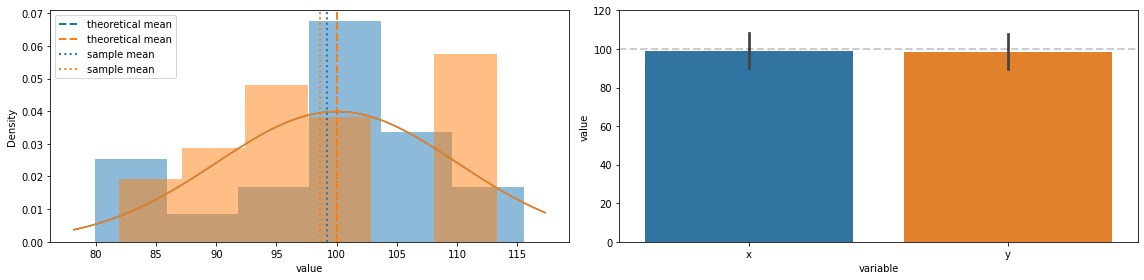

In [148]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

ax = axes[0]
sns.histplot(x1, ax=ax, color="C0", linewidth=0, alpha=0.5, stat="density")
sns.histplot(x2, ax=ax, color="C1", linewidth=0, alpha=0.5, stat="density")

ax.axvline(m1, label="theoretical mean", color='C0', lw=2, ls='--')
ax.axvline(m2, label="theoretical mean", color='C1', lw=2, ls='--')

ax.axvline(np.mean(x1), label="sample mean", color='C0', lw=2, ls=':')
ax.axvline(np.mean(x2), label="sample mean", color='C1', lw=2, ls=':')

x_min, x_max= ax.get_xlim()

x_th = np.linspace(x_min, x_max, 1000)
y_th = stats.distributions.norm.pdf(x_th, loc=m1, scale=sd1)
ax.plot(x_th, y_th, color="C0")

x_th = np.linspace(x_min, x_max, 1000)
y_th = stats.distributions.norm.pdf(x_th, loc=m2, scale=sd2)
ax.plot(x_th, y_th, color="C1")

ax.set_ylabel("Density")
ax.set_xlabel("value")
ax.legend()

ax = axes[1]

df = pd.DataFrame({
    "x": x1,
    "y": x2
}).melt()

sns.barplot(x="variable", y="value", ax=ax, data=df, ci="sd")

ax.set_ylim(0, max(m1, m2) + max(sd1, sd2) * 2)
ax.axhline(m1, ls='--', color='black', alpha=0.1, lw=2)
ax.axhline(m2, ls='--', color='black', alpha=0.1, lw=2)

plt.tight_layout()
plt.show()

In [149]:
thr = 0.05
t, p = stats.ttest_ind(x1, x2, equal_var=True)
print(f"t={t}, p={p}, can reject={p < thr}")

t=0.1909506632557873, p=0.8495808213222644, can reject=False


## Error II: False negative

In [156]:
np.random.seed(0)

m1, m2 = 0, 1
sd1, sd2 = 0.9, 0.9

n = 20

x1 = np.random.normal(m1, scale=sd1, size=n)
x2 = np.random.normal(m2, scale=sd2, size=n)

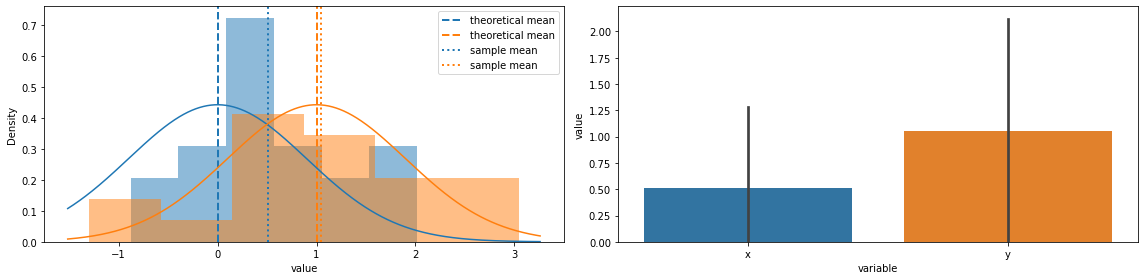

In [159]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

ax = axes[0]
sns.histplot(x1, ax=ax, color="C0", linewidth=0, alpha=0.5, stat="density")
sns.histplot(x2, ax=ax, color="C1", linewidth=0, alpha=0.5, stat="density")

ax.axvline(m1, label="theoretical mean", color='C0', lw=2, ls='--')
ax.axvline(m2, label="theoretical mean", color='C1', lw=2, ls='--')

ax.axvline(np.mean(x1), label="sample mean", color='C0', lw=2, ls=':')
ax.axvline(np.mean(x2), label="sample mean", color='C1', lw=2, ls=':')

x_min, x_max= ax.get_xlim()

x_th = np.linspace(x_min, x_max, 1000)
y_th = stats.distributions.norm.pdf(x_th, loc=m1, scale=sd1)
ax.plot(x_th, y_th, color="C0")

x_th = np.linspace(x_min, x_max, 1000)
y_th = stats.distributions.norm.pdf(x_th, loc=m2, scale=sd2)
ax.plot(x_th, y_th, color="C1")

ax.set_ylabel("Density")
ax.set_xlabel("value")
ax.legend()

ax = axes[1]

df = pd.DataFrame({"x": x1, "y": x2}).melt()

sns.barplot(x="variable", y="value", ax=ax, data=df, ci="sd")
ax.set_ylim(0, ax.get_ylim()[-1])

plt.tight_layout()
plt.show()

In [152]:
thr = 0.05
t, p = stats.ttest_ind(x1, x2, equal_var=True)

print(f"t={t}, p={p}, can reject={p < thr}")

t=-1.7830545865581873, p=0.08256721720461004, can reject=False


# The p-value as a probability to reject by mistake

In [ ]:
n = 100

mu1, mu2 = 100, 110
sigma1, sigma2 = 30, 60

np.random.seed(1234)
x1 = np.random.normal(mu1, scale=sigma1, size=n)
x2 = np.random.normal(mu2, scale=sigma2, size=n)

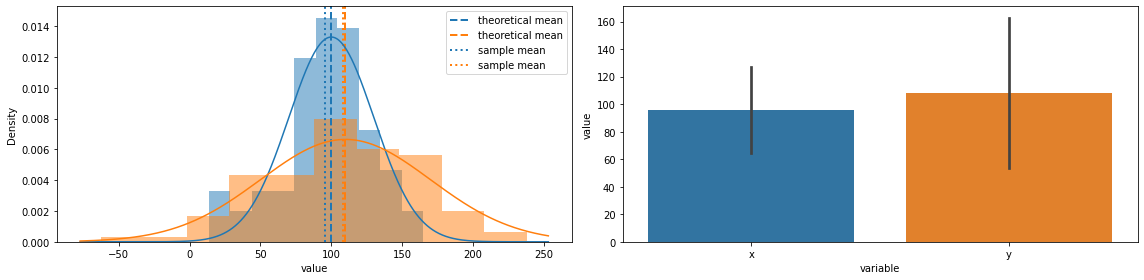

In [164]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

ax = axes[0]
sns.histplot(x1, ax=ax, color="C0", linewidth=0, alpha=0.5, stat="density")
sns.histplot(x2, ax=ax, color="C1", linewidth=0, alpha=0.5, stat="density")

ax.axvline(mu1, label="theoretical mean", color='C0', lw=2, ls='--')
ax.axvline(mu2, label="theoretical mean", color='C1', lw=2, ls='--')

ax.axvline(np.mean(x1), label="sample mean", color='C0', lw=2, ls=':')
ax.axvline(np.mean(x2), label="sample mean", color='C1', lw=2, ls=':')

x_min, x_max = ax.get_xlim()

x_th = np.linspace(x_min, x_max, 1000)
y_th = stats.distributions.norm.pdf(x_th, loc=mu1, scale=sigma1)
ax.plot(x_th, y_th, color="C0")

x_th = np.linspace(x_min, x_max, 1000)
y_th = stats.distributions.norm.pdf(x_th, loc=mu2, scale=sigma2)
ax.plot(x_th, y_th, color="C1")

ax.set_ylabel("Density")
ax.set_xlabel("value")
ax.legend()

ax = axes[1]

df = pd.DataFrame({"x": x1, "y": x2}).melt()

sns.barplot(x="variable", y="value", ax=ax, data=df, ci="sd")
ax.set_ylim(0, ax.get_ylim()[-1])

plt.tight_layout()
plt.show()

In [165]:
m1 = np.mean(x1)
m2 = np.mean(x2)

sig1 = np.std(x1)  
sig2 = np.std(x2)

print("mean observed x1", m1)
print("mean observed x2", m2)
print("sd observed x1", sig1)
print("sd observed x2", sig2)

t, p = stats.ttest_ind(x1, x2, equal_var=False)
print(f"t = {t}, p = {p}")

mean observed x1 95.83743201005956
mean observed x2 108.30469930234821
sd observed x1 31.409363673998755
sd observed x2 54.62395004677428
t = -1.9686834528275583, p = 0.05073879530810289


m1 101.05336849376309
m2 106.990752612104
sig 29.870545510062087
sig 58.71351368741412
t = -0.8967917151340026, p = 0.37129608235308287
p/2 0.18564804117654143


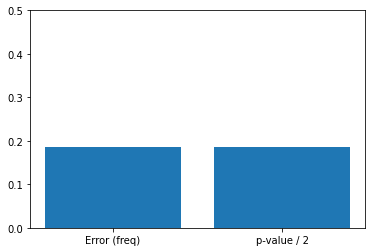

In [160]:
n_trials = 10000

mu1_sup_mu2 = np.zeros(n_trials)
for i in range(n_trials):
    x1 = np.random.normal(m1, scale=sig1, size=n)
    x2 = np.random.normal(m2, scale=sig2, size=n)
    mu1_sup_mu2[i] = np.mean(x1) > np.mean(x2)

err_freq = np.mean(mu1_sup_mu2)

fig, ax = plt.subplots()
labels = ['Error (freq)', "p-value / 2"]
values = [err_freq, p/2]
ax.bar(labels, values)
ax.set_ylim(0, 0.5)
plt.show()

# The todo-NOT list

<img src="img/Eureka-1.jpg" width="500">

## Conclusive Remarks and a Few Takeaways
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-success">
<h2><img src="img/logo/goal.png" width="20" align="left">&nbsp;Learning objectives</h2>
    <br>Learn by a series of examples the elementary rules of experimentation, and the main threats of validity
</div>


## Additional material
<a href="#Course-Overview">Course Overview</a>

(empty, for now!)
